# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [3]:
labels_full = data[:,0]
A_full = data[:,1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels

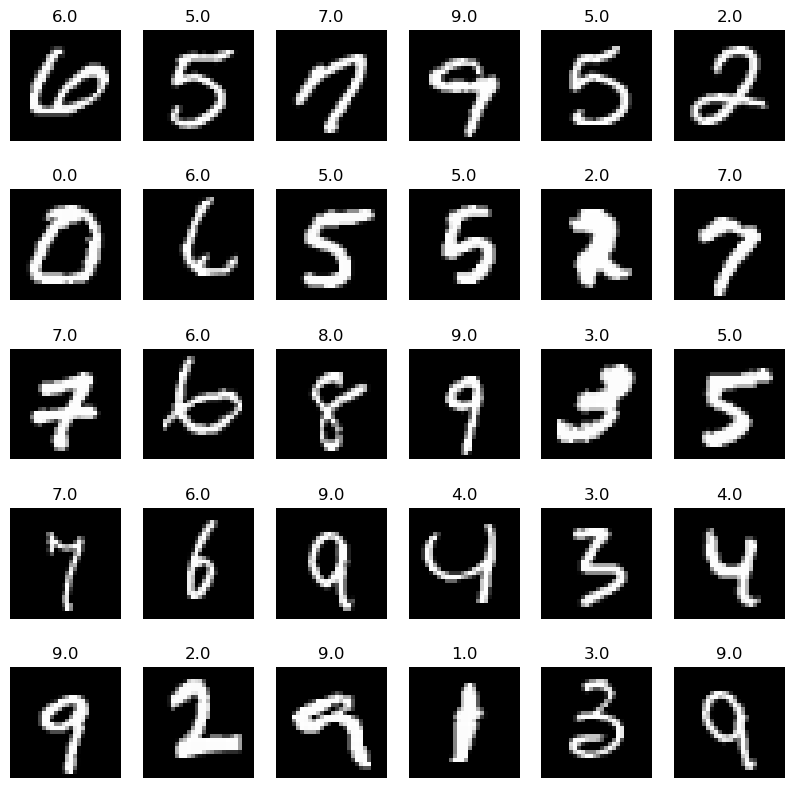

In [4]:
fig,axs = plt.subplots(5,6,figsize=(10,10))
axs = axs.ravel()

for i in range(30):
    picture = A_full[:,i].reshape(28,28)
    axs[i].imshow(picture,cmap='gray')
    axs[i].set_title(f'{labels_full[i]}')
    axs[i].set_axis_off()

Visualize the first 30 pictures corresponding the the digit "9"

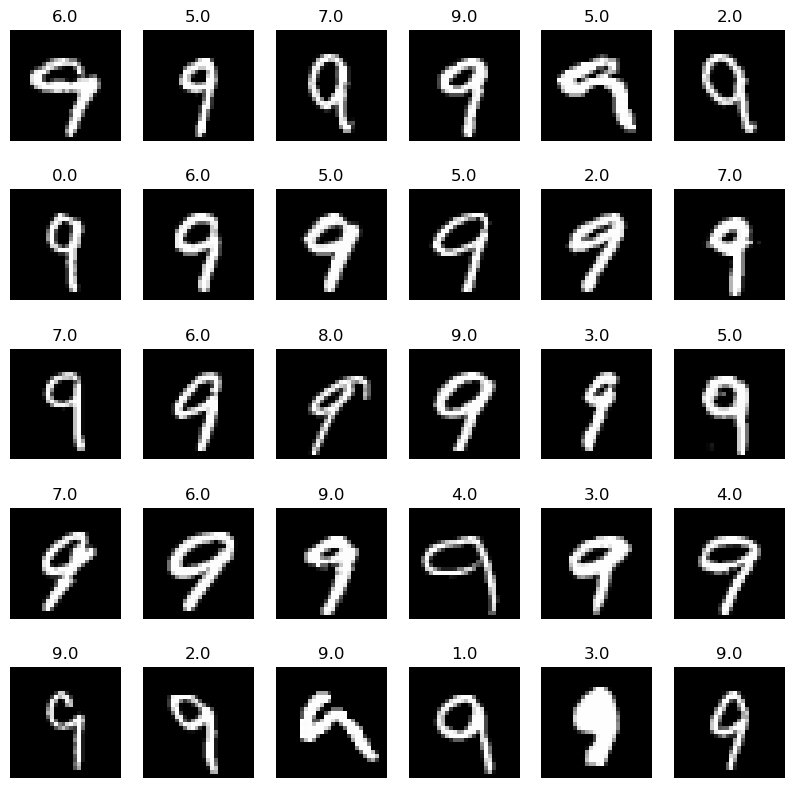

In [5]:
nines = A_full[:,labels_full==9]

fig,axs = plt.subplots(5,6,figsize=(10,10))
axs = axs.ravel()

for i in range(30):
    picture = nines[:,i].reshape(28,28)
    axs[i].imshow(picture,cmap='gray')
    axs[i].set_title(f'{labels_full[i]}')
    axs[i].set_axis_off()

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [6]:
labels = labels_full[(labels_full == 0) | (labels_full == 9)]
reduced_df = A_full[:, (labels_full == 0) | (labels_full == 9)]

Plot the first 30 training images. 

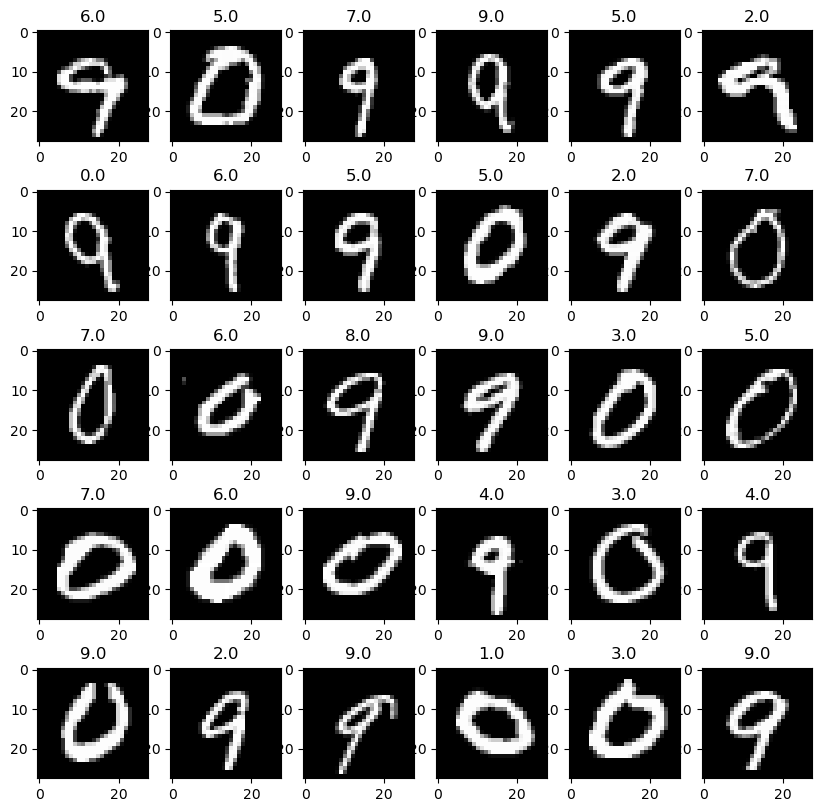

In [7]:
fig,axs = plt.subplots(5,6,figsize=(10,10))
axs = axs.ravel()

for i in range(30):
    axs[i].imshow(reduced_df[:,i].reshape(28,28),cmap='gray')
    axs[i].set_title(f'{labels_full[i]}')

Compute and visualize the average of the training data

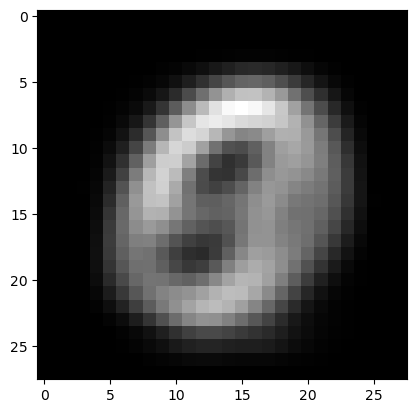

In [8]:
X_mean = np.mean(reduced_df, axis=1)
plt.imshow(X_mean.reshape(28,28), cmap='gray')

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Cumulative sum of singular values')

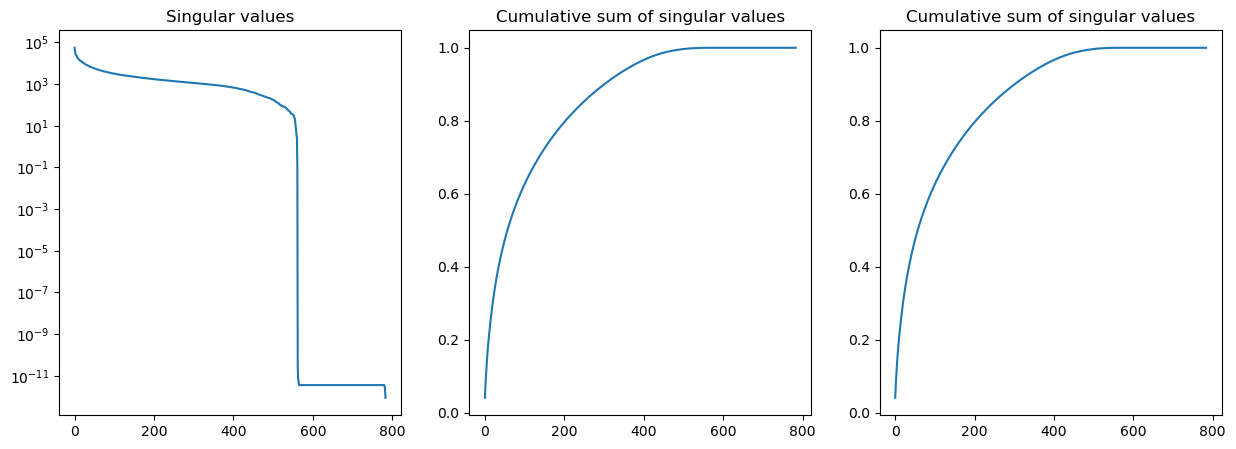

In [9]:
X_bar = reduced_df - X_mean[:, None]

U, S, Vt = np.linalg.svd(X_bar, full_matrices=False)

fig,axs = plt.subplots(1,3,figsize=(15,5))

axs[0].semilogy(S)
axs[0].set_title('Singular values')

axs[1].plot(np.cumsum(S)/np.sum(S))
axs[1].set_title('Cumulative sum of singular values')

axs[2].plot(np.cumsum(S)/np.sum(S))
axs[2].set_title('Cumulative sum of singular values')

Visualize the first 30 principal axes

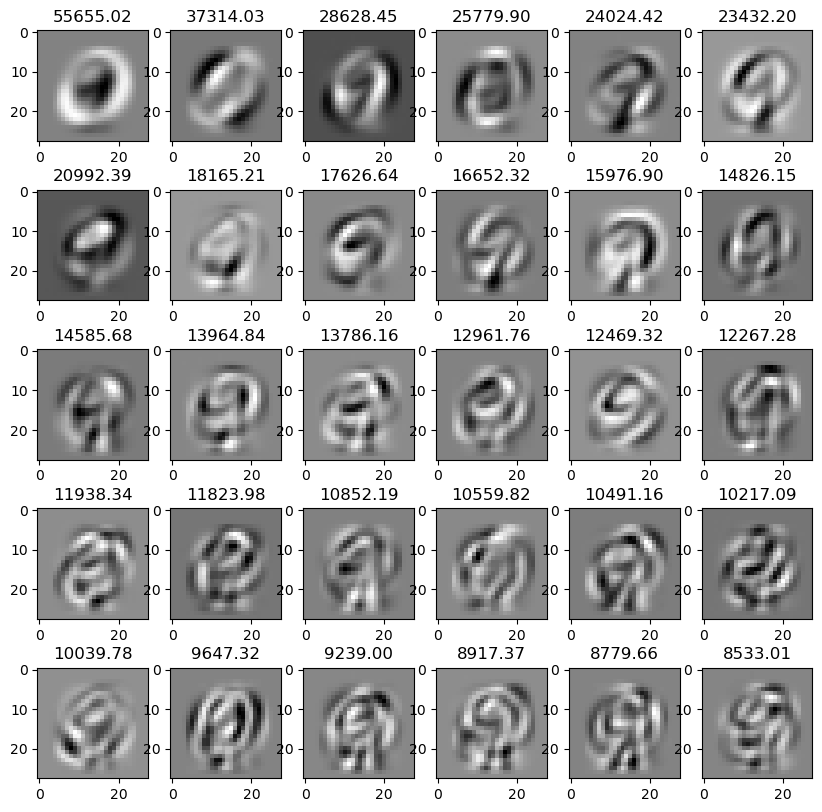

In [10]:
fig,axs = plt.subplots(5,6,figsize=(10,10))
axs = axs.ravel()

for i in range(30):
    axs[i].imshow(U[:,i].reshape(28,28),cmap='gray')
    axs[i].set_title(f'{S[i]:.2f}')

Compute the first two principal components corresponding to the first image

In [11]:
first_image = X_bar[:,0]

pc1 = np.inner(first_image,U[:,0]) 
phi2 = np.inner(first_image,U[:,1])

print(f"First principal component: {pc1:.2f}")
print(f"Second principal component: {phi2:.2f}")

First principal component: -529.10
Second principal component: -580.86


Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

In [12]:
Phi = U.T @ X_bar

print(f"First principal component: {Phi[0,0]}")
print(f"Second principal component: {Phi[1,0]}")

First principal component: -529.0964148086606
Second principal component: -580.860850162437


Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

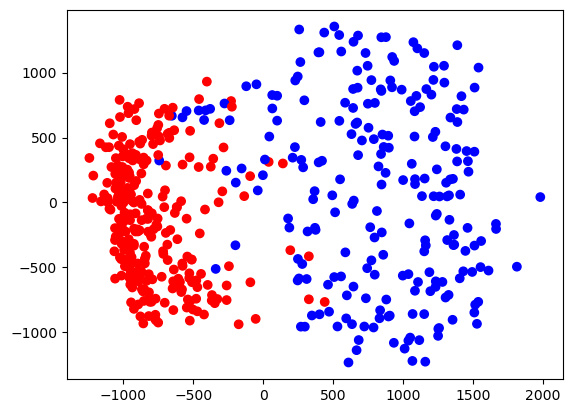

In [13]:
n_pics = 500
COLORMAP = {9: 'red', 0: 'blue'}  # Added missing key 6
plt.scatter(Phi[0, :n_pics], Phi[1, :n_pics], c=[COLORMAP[e] for e in labels[:n_pics]])

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

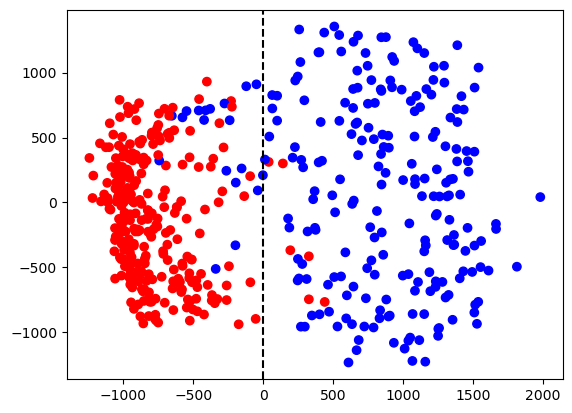

In [14]:
n_pics = 500
COLORMAP = {9: 'red', 0: 'blue'}  # Added missing key 6
plt.scatter(Phi[0, :n_pics], Phi[1, :n_pics], c=[COLORMAP[e] for e in labels[:n_pics]])
plt.axvline(x=0, color='black', linestyle='--')

In [15]:
test = np.genfromtxt('mnist_test.csv', delimiter=',')
labels_test_full = test[:,0]
A_test_full = test[:,1:].transpose()

In [16]:
mask = (labels_test_full == 0) | (labels_test_full == 9)

A_test = A_test_full[:, mask]
labels_test = labels_test_full[mask]

In [17]:
A_bar_test = A_test - X_mean[:, None]
Phi_test = U.T @ A_bar_test

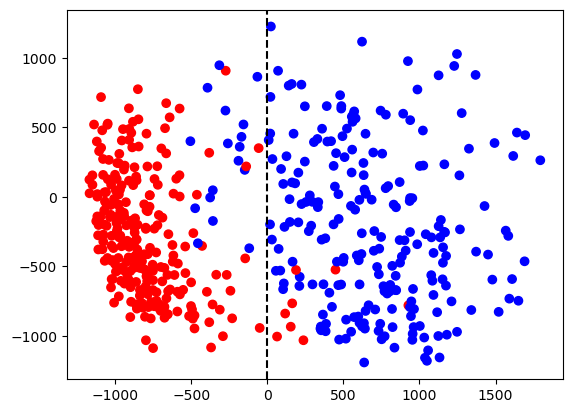

In [18]:
threshold = 0

plt.scatter(
    Phi_test[0, :n_pics],
    Phi_test[1, :n_pics],
    c=[COLORMAP[e] for e in labels_test[:n_pics]]
)
plt.axvline(x=threshold, color='black', linestyle='--')

In [19]:
mask_predicted = (Phi_test[0, :] < threshold)
labels_predicted = mask_predicted.astype(int) * 9 + (~mask_predicted).astype(int) * 0

In [20]:
true_0 = (labels_test == 0) & (labels_predicted == 0)
true_9 = (labels_test == 9) & (labels_predicted == 9)

false_0 = (labels_test == 0) & (labels_predicted == 9)
false_9 = (labels_test == 9) & (labels_predicted == 0)

print(f"True positive: {np.sum(true_0)}")
print(f"True negative: {np.sum(true_9)}")

True positive: 927
True negative: 979


In [21]:
accuracy = (true_0.sum() + true_9.sum()) / len(labels_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


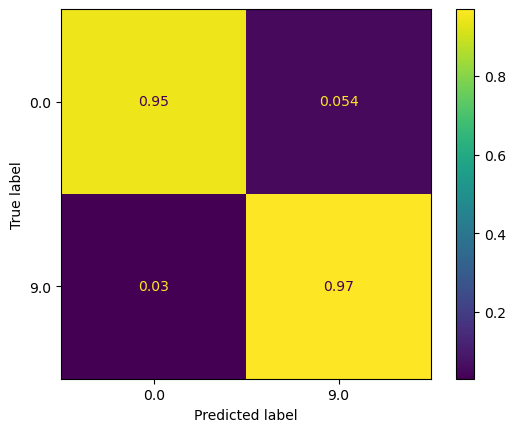

In [25]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(labels_test, labels_predicted, normalize='true')